In [1]:
pip install apyori

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Import the Libraries
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori
import utils
%matplotlib inline

In [3]:
#Loading the dataset
voting_db = pd.read_csv('house-votes-84.data')

In [4]:
#Explore the data
voting_db.head()

,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
1,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y


In [5]:
voting_db.tail()

,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
429,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
430,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
431,republican,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y
432,republican,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y
433,republican,n,y,n,y,y,y,n,n,n,y,n,y,y,y,?,n


In [6]:
# Renaming the first columns of our data frame
voting_db.rename(columns = {'republican' : 'Republican?', 'n' : 'Handicapped-infants', 'y' : 'Water-project-cost', 'n.1' : 'Budget-resolution', 'y.1' : 'Physician-fee-freeze', 'y.2' : 'El-Salvador-aid', 'y.3' : 'School-Religious-Group', 'n.2' : 'Anti-Satellite-test-ban', 'n.3' : 'Nicaraguan-contras-aid','n.4' : 'MX-missile', 'y.4' : 'Immigration', '?' : 'Synfuels-corporation-cutback','y.5' : 'Education-spending', 'y.6' : 'Superfund-right-to-sue', 'y.7' : 'Crime', 'n.5' : 'Duty-free-exports', 'y.8' : 'Export-administration-act-south-africa' }, 
                  inplace = True)

In [7]:
voting_db.head()

,Republican?,Handicapped-infants,Water-project-cost,Budget-resolution,Physician-fee-freeze,El-Salvador-aid,School-Religious-Group,Anti-Satellite-test-ban,Nicaraguan-contras-aid,MX-missile,Immigration,Synfuels-corporation-cutback,Education-spending,Superfund-right-to-sue,Crime,Duty-free-exports,Export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
1,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y


In [8]:
voting_db.tail()

,Republican?,Handicapped-infants,Water-project-cost,Budget-resolution,Physician-fee-freeze,El-Salvador-aid,School-Religious-Group,Anti-Satellite-test-ban,Nicaraguan-contras-aid,MX-missile,Immigration,Synfuels-corporation-cutback,Education-spending,Superfund-right-to-sue,Crime,Duty-free-exports,Export-administration-act-south-africa
429,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
430,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
431,republican,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y
432,republican,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y
433,republican,n,y,n,y,y,y,n,n,n,y,n,y,y,y,?,n


In [9]:
voting_db.describe()

,Republican?,Handicapped-infants,Water-project-cost,Budget-resolution,Physician-fee-freeze,El-Salvador-aid,School-Religious-Group,Anti-Satellite-test-ban,Nicaraguan-contras-aid,MX-missile,Immigration,Synfuels-corporation-cutback,Education-spending,Superfund-right-to-sue,Crime,Duty-free-exports,Export-administration-act-south-africa
count,434,434,434,434,434,434,434,434,434,434,434,434,434,434,434,434,434
unique,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
top,democrat,n,y,y,n,y,y,y,y,y,y,n,n,y,y,n,y
freq,267,235,194,253,247,211,271,239,242,207,215,264,233,208,247,232,268


In [10]:
voting_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Republican?                             434 non-null    object
 1   Handicapped-infants                     434 non-null    object
 2   Water-project-cost                      434 non-null    object
 3   Budget-resolution                       434 non-null    object
 4   Physician-fee-freeze                    434 non-null    object
 5   El-Salvador-aid                         434 non-null    object
 6   School-Religious-Group                  434 non-null    object
 7   Anti-Satellite-test-ban                 434 non-null    object
 8   Nicaraguan-contras-aid                  434 non-null    object
 9   MX-missile                              434 non-null    object
 10  Immigration                             434 non-null    object
 11  Synfue

In [11]:
print(voting_db.isnull().sum())

Republican?                               0
Handicapped-infants                       0
Water-project-cost                        0
Budget-resolution                         0
Physician-fee-freeze                      0
El-Salvador-aid                           0
School-Religious-Group                    0
Anti-Satellite-test-ban                   0
Nicaraguan-contras-aid                    0
MX-missile                                0
Immigration                               0
Synfuels-corporation-cutback              0
Education-spending                        0
Superfund-right-to-sue                    0
Crime                                     0
Duty-free-exports                         0
Export-administration-act-south-africa    0
dtype: int64


In [12]:
!pip install utils

In [13]:
Rules = list(apriori(voting_db, min_support = 0.2, min_confidence = 0.5))

In [14]:
voting_db.head()

,Republican?,Handicapped-infants,Water-project-cost,Budget-resolution,Physician-fee-freeze,El-Salvador-aid,School-Religious-Group,Anti-Satellite-test-ban,Nicaraguan-contras-aid,MX-missile,Immigration,Synfuels-corporation-cutback,Education-spending,Superfund-right-to-sue,Crime,Duty-free-exports,Export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
1,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y


In [15]:
# Renaming the row data entries
voting_db['Handicapped-infants'] = voting_db['Handicapped-infants'].replace(['y', 'n', '?'], ['Yes', 'No', 'No'])
voting_db['Water-project-cost'] = voting_db['Water-project-cost'].replace(['y', 'n', '?'], ['Yes', 'No', 'No'])
voting_db['Budget-resolution'] = voting_db['Budget-resolution'].replace(['y', 'n', '?'], ['Yes', 'No', 'No'])
voting_db['Physician-fee-freeze'] = voting_db['Physician-fee-freeze'].replace(['y', 'n', '?'], ['Yes', 'No', 'No'])
voting_db['El-Salvador-aid'] = voting_db['El-Salvador-aid'].replace(['y', 'n', '?'], ['Yes', 'No', 'No'])
voting_db['Anti-Satellite-test-ban'] = voting_db['Anti-Satellite-test-ban'].replace(['y', 'n', '?'], ['Yes', 'No', 'No'])
voting_db['Nicaraguan-contras-aid'] = voting_db['Nicaraguan-contras-aid'].replace(['y', 'n', '?'], ['Yes', 'No', 'No'])
voting_db['MX-missile'] = voting_db['MX-missile'].replace(['y', 'n', '?'], ['Yes', 'No', 'No'])
voting_db['Immigration'] = voting_db['Immigration'].replace(['y', 'n', '?'], ['Yes', 'No', 'No'])
voting_db['Synfuels-corporation-cutback'] = voting_db['Synfuels-corporation-cutback'].replace(['y', 'n', '?'], ['Yes', 'No', 'No'])
voting_db['Education-spending'] = voting_db['Education-spending'].replace(['y', 'n', '?'], ['Yes', 'No', 'No'])
voting_db['Superfund-right-to-sue'] = voting_db['Superfund-right-to-sue'].replace(['y', 'n', '?'], ['Yes', 'No', 'No'])
voting_db['Crime'] = voting_db['Crime'].replace(['y', 'n', '?'], ['Yes', 'No', 'No'])
voting_db['Duty-free-exports'] = voting_db['Duty-free-exports'].replace(['y', 'n', '?'], ['Yes', 'No', 'No'])
voting_db['Export-administration-act-south-africa'] = voting_db['Export-administration-act-south-africa'].replace(['y', 'n', '?'], ['Yes', 'No', 'No'])
voting_db['School-Religious-Group'] = voting_db['School-Religious-Group'].replace(['y', 'n', '?'], ['Yes', 'No', 'No'])
voting_db['Republican?'] = voting_db['Republican?'].replace(['republican', 'democrat', '?'], ['Yes', 'No', 'No'])


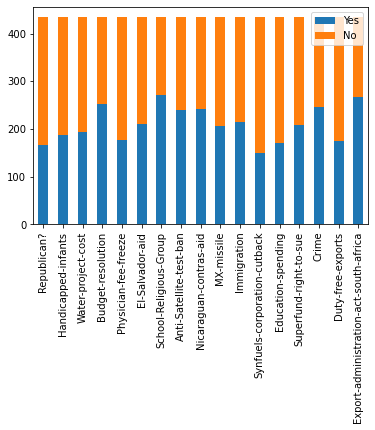

In [16]:
#Plot and explore the dataset
y = (voting_db == 'Yes').sum()
n = (voting_db == 'No').sum()
approved = pd.concat([y, n], axis = 1, keys = ['Yes', 'No'])
ax = approved.plot.bar(stacked = True)
plt.show()

In [17]:
voting_db.head() #Checking the renamed rows

,Republican?,Handicapped-infants,Water-project-cost,Budget-resolution,Physician-fee-freeze,El-Salvador-aid,School-Religious-Group,Anti-Satellite-test-ban,Nicaraguan-contras-aid,MX-missile,Immigration,Synfuels-corporation-cutback,Education-spending,Superfund-right-to-sue,Crime,Duty-free-exports,Export-administration-act-south-africa
0,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,No,No,Yes,Yes,Yes,No,No
1,No,No,Yes,Yes,No,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,No,No
2,No,No,Yes,Yes,No,No,Yes,No,No,No,No,Yes,No,Yes,No,No,Yes
3,No,Yes,Yes,Yes,No,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,Yes,Yes
4,No,No,Yes,Yes,No,Yes,Yes,No,No,No,No,No,No,Yes,Yes,Yes,Yes


In [18]:
#Preparing my data
voting_results = utils.data_prepare(voting_db)

In [19]:
# Aplying the Apriori Algorithm
Rules = list(apriori(voting_results, min_support = 0.02, min_confidence = 0.2, max_length = 3))
associationRules = utils.extract(Rules)
rules_df = pd.DataFrame(associationRules, columns = ['LHS', 'RHS', 'Support','Confidence', 'Lift'])
len(rules_df)

2921

In [20]:
pd.set_option('display.max_colwidth', 1)

In [21]:
#Generating the rules
Rules = list(apriori(voting_results, min_support = 0.02, min_confidence = 0.2))
associationRules = utils.extract(Rules)
rules_df = pd.DataFrame(associationRules, columns = ['LHS', 'RHS', 'Support','Confidence', 'Lift'])
rules_df

,LHS,RHS,Support,Confidence,Lift
0,[],[Anti-Satellite-test-ban],0.550691,0.550691,1.000000
1,[],[Budget-resolution],0.582949,0.582949,1.000000
2,[],[Crime],0.569124,0.569124,1.000000
3,[],[Duty-free-exports],0.400922,0.400922,1.000000
4,[],[Education-spending],0.391705,0.391705,1.000000
...,...,...,...,...,...
194735,"[Export-administration-act-south-africa, Superfund-right-to-sue, School-Religious-Group, Crime, Physician-fee-freeze, El-Salvador-aid, Water-project-cost, Education-spending, Republican?]",[Immigration],0.027650,0.444444,0.897158
194736,"[Superfund-right-to-sue, Immigration, School-Religious-Group, Crime, Physician-fee-freeze, El-Salvador-aid, Water-project-cost, Education-spending, Republican?]",[Export-administration-act-south-africa],0.027650,0.500000,0.809701
194737,"[Export-administration-act-south-africa, Superfund-right-to-sue, Immigration, School-Religious-Group, Crime, Physician-fee-freeze, Water-project-cost, Education-spending, Republican?]",[El-Salvador-aid],0.027650,1.000000,2.056872
194738,"[Export-administration-act-south-africa, Superfund-right-to-sue, Immigration, School-Religious-Group, Crime, Physician-fee-freeze, El-Salvador-aid, Water-project-cost, Republican?]",[Education-spending],0.027650,0.857143,2.188235


In [22]:
rules_df.nlargest(20, 'Lift') #Filter According to lift

,LHS,RHS,Support,Confidence,Lift
174804,"[Physician-fee-freeze, Immigration, Anti-Satellite-test-ban, School-Religious-Group]","[Export-administration-act-south-africa, Nicaraguan-contras-aid, Republican?, El-Salvador-aid]",0.020737,0.562500,16.275000
174812,"[Export-administration-act-south-africa, Nicaraguan-contras-aid, Republican?, El-Salvador-aid]","[Physician-fee-freeze, Immigration, School-Religious-Group, Anti-Satellite-test-ban]",0.020737,0.600000,16.275000
189766,"[Physician-fee-freeze, Immigration, Anti-Satellite-test-ban, School-Religious-Group]","[Export-administration-act-south-africa, Crime, El-Salvador-aid, Nicaraguan-contras-aid, Republican?]",0.020737,0.562500,16.275000
189789,"[Export-administration-act-south-africa, Nicaraguan-contras-aid, Republican?, El-Salvador-aid]","[Immigration, School-Religious-Group, Crime, Physician-fee-freeze, Anti-Satellite-test-ban]",0.020737,0.600000,16.275000
189836,"[Immigration, School-Religious-Group, Crime, Physician-fee-freeze, Anti-Satellite-test-ban]","[Export-administration-act-south-africa, Nicaraguan-contras-aid, Republican?, El-Salvador-aid]",0.020737,0.562500,16.275000
189879,"[Export-administration-act-south-africa, Crime, El-Salvador-aid, Nicaraguan-contras-aid, Republican?]","[Physician-fee-freeze, Immigration, School-Religious-Group, Anti-Satellite-test-ban]",0.020737,0.600000,16.275000
123704,"[Export-administration-act-south-africa, Nicaraguan-contras-aid, Republican?]","[Physician-fee-freeze, Immigration, Anti-Satellite-test-ban, Budget-resolution]",0.020737,0.428571,15.500000
123710,"[Physician-fee-freeze, Immigration, Anti-Satellite-test-ban, Budget-resolution]","[Export-administration-act-south-africa, Nicaraguan-contras-aid, Republican?]",0.020737,0.750000,15.500000
166673,"[Export-administration-act-south-africa, Nicaraguan-contras-aid, Republican?]","[Immigration, Crime, Physician-fee-freeze, Anti-Satellite-test-ban, Budget-resolution]",0.020737,0.428571,15.500000
166684,"[Physician-fee-freeze, Immigration, Anti-Satellite-test-ban, Budget-resolution]","[Export-administration-act-south-africa, Nicaraguan-contras-aid, Republican?, Crime]",0.020737,0.750000,15.500000


In [31]:
#Plotting the generated rules
rules_df = pd.DataFrame(associationRules, columns = ['LHS', 'RHS', 'Support','Confidence', 'Lift'])
import plotly.express as px
fig = px.scatter(rules_df, x = 'Confidence', y = 'Support', color = 'Lift',
                hover_data = ['LHS', 'RHS'], color_continuous_scale = 'agsunset')
fig.show()

In [24]:
#Plot of the generated rule according to lift
rules_df = rules_df.nlargest(20, 'Lift')
import plotly.express as px
fig = px.scatter(rules_df, x = 'Confidence', y = 'Lift', color = 'Support',
                hover_data = ['LHS', 'RHS'], color_continuous_scale = 'agsunset')
fig.show()

In [25]:
rules_df.nlargest(20, 'Support') #Filter according to Support

,LHS,RHS,Support,Confidence,Lift
174804,"[Physician-fee-freeze, Immigration, Anti-Satellite-test-ban, School-Religious-Group]","[Export-administration-act-south-africa, Nicaraguan-contras-aid, Republican?, El-Salvador-aid]",0.020737,0.562500,16.275000
174812,"[Export-administration-act-south-africa, Nicaraguan-contras-aid, Republican?, El-Salvador-aid]","[Physician-fee-freeze, Immigration, School-Religious-Group, Anti-Satellite-test-ban]",0.020737,0.600000,16.275000
189761,"[Export-administration-act-south-africa, Physician-fee-freeze, Anti-Satellite-test-ban, School-Religious-Group]","[Immigration, Crime, El-Salvador-aid, Nicaraguan-contras-aid, Republican?]",0.020737,0.391304,15.438735
189159,"[Export-administration-act-south-africa, Crime, Physician-fee-freeze, Anti-Satellite-test-ban, Education-spending]","[Superfund-right-to-sue, Republican?, Nicaraguan-contras-aid, El-Salvador-aid]",0.020737,0.391304,15.438735
189089,"[Education-spending, Physician-fee-freeze, Anti-Satellite-test-ban, Export-administration-act-south-africa]","[Superfund-right-to-sue, Crime, El-Salvador-aid, Nicaraguan-contras-aid, Republican?]",0.020737,0.391304,15.438735
174799,"[Export-administration-act-south-africa, Physician-fee-freeze, Anti-Satellite-test-ban, School-Religious-Group]","[Republican?, Nicaraguan-contras-aid, Immigration, El-Salvador-aid]",0.020737,0.391304,15.438735
174463,"[Education-spending, Physician-fee-freeze, Anti-Satellite-test-ban, Export-administration-act-south-africa]","[Superfund-right-to-sue, Republican?, Nicaraguan-contras-aid, El-Salvador-aid]",0.020737,0.391304,15.438735
189189,"[Export-administration-act-south-africa, Physician-fee-freeze, El-Salvador-aid, Anti-Satellite-test-ban, Education-spending]","[Superfund-right-to-sue, Republican?, Crime, Nicaraguan-contras-aid]",0.020737,0.428571,15.500000
189132,"[Superfund-right-to-sue, Nicaraguan-contras-aid, Republican?, Crime]","[Export-administration-act-south-africa, Physician-fee-freeze, El-Salvador-aid, Anti-Satellite-test-ban, Education-spending]",0.020737,0.750000,15.500000
166740,"[Immigration, Crime, Physician-fee-freeze, Anti-Satellite-test-ban, Budget-resolution]","[Export-administration-act-south-africa, Nicaraguan-contras-aid, Republican?]",0.020737,0.750000,15.500000


In [26]:
rules_df.nlargest(50, 'Confidence') # Filter according to Confidence

,LHS,RHS,Support,Confidence,Lift
166740,"[Immigration, Crime, Physician-fee-freeze, Anti-Satellite-test-ban, Budget-resolution]","[Export-administration-act-south-africa, Nicaraguan-contras-aid, Republican?]",0.020737,0.750000,15.500000
123710,"[Physician-fee-freeze, Immigration, Anti-Satellite-test-ban, Budget-resolution]","[Export-administration-act-south-africa, Nicaraguan-contras-aid, Republican?]",0.020737,0.750000,15.500000
189132,"[Superfund-right-to-sue, Nicaraguan-contras-aid, Republican?, Crime]","[Export-administration-act-south-africa, Physician-fee-freeze, El-Salvador-aid, Anti-Satellite-test-ban, Education-spending]",0.020737,0.750000,15.500000
166684,"[Physician-fee-freeze, Immigration, Anti-Satellite-test-ban, Budget-resolution]","[Export-administration-act-south-africa, Nicaraguan-contras-aid, Republican?, Crime]",0.020737,0.750000,15.500000
189789,"[Export-administration-act-south-africa, Nicaraguan-contras-aid, Republican?, El-Salvador-aid]","[Immigration, School-Religious-Group, Crime, Physician-fee-freeze, Anti-Satellite-test-ban]",0.020737,0.600000,16.275000
189879,"[Export-administration-act-south-africa, Crime, El-Salvador-aid, Nicaraguan-contras-aid, Republican?]","[Physician-fee-freeze, Immigration, School-Religious-Group, Anti-Satellite-test-ban]",0.020737,0.600000,16.275000
174812,"[Export-administration-act-south-africa, Nicaraguan-contras-aid, Republican?, El-Salvador-aid]","[Physician-fee-freeze, Immigration, School-Religious-Group, Anti-Satellite-test-ban]",0.020737,0.600000,16.275000
174804,"[Physician-fee-freeze, Immigration, Anti-Satellite-test-ban, School-Religious-Group]","[Export-administration-act-south-africa, Nicaraguan-contras-aid, Republican?, El-Salvador-aid]",0.020737,0.562500,16.275000
189766,"[Physician-fee-freeze, Immigration, Anti-Satellite-test-ban, School-Religious-Group]","[Export-administration-act-south-africa, Crime, El-Salvador-aid, Nicaraguan-contras-aid, Republican?]",0.020737,0.562500,16.275000
189836,"[Immigration, School-Religious-Group, Crime, Physician-fee-freeze, Anti-Satellite-test-ban]","[Export-administration-act-south-africa, Nicaraguan-contras-aid, Republican?, El-Salvador-aid]",0.020737,0.562500,16.275000


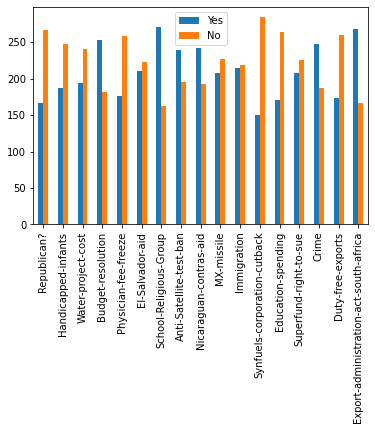

In [28]:
#Plot of distribution of responses between the variables
ax = approved.plot.bar()
plt.show()

In [29]:
# Generating Rules relating to Republicans
Rules = list(apriori(voting_results, min_support = 0.3, min_confidence = 0.7))
associationRules = utils.extract(Rules, 'Republican?', 2)
utils.inspect(associationRules)

The number of associated rules: 49
LHS: ['Education-spending'] --> RHS:['Republican?'], support: 0.31, confidence: 0.79, lift: 2.05
--------------------------------------------------------------------------------
LHS: ['El-Salvador-aid'] --> RHS:['Republican?'], support: 0.36, confidence: 0.74, lift: 1.92
--------------------------------------------------------------------------------
LHS: ['Physician-fee-freeze'] --> RHS:['Republican?'], support: 0.37, confidence: 0.92, lift: 2.39
--------------------------------------------------------------------------------
LHS: ['El-Salvador-aid'] --> RHS:['Republican?', 'Crime'], support: 0.34, confidence: 0.70, lift: 1.94
--------------------------------------------------------------------------------
LHS: ['Crime', 'El-Salvador-aid'] --> RHS:['Republican?'], support: 0.34, confidence: 0.77, lift: 1.99
--------------------------------------------------------------------------------
LHS: ['Physician-fee-freeze'] --> RHS:['Republican?', 'Crime'], 